In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
Berkay = pd.read_csv('Wine_Quality_DataSet.csv')
Berkay

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
Berkay.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
Berkay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<AxesSubplot:>

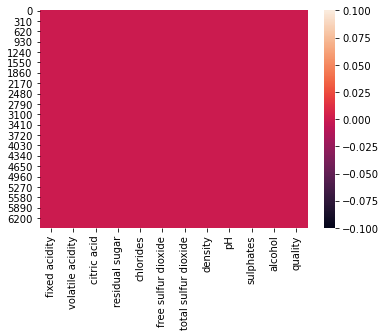

In [8]:
## visulize for null values
sns.heatmap(Berkay.isnull())

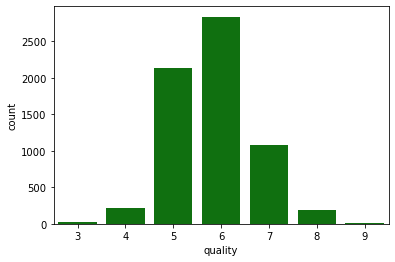

In [23]:
# vusulize count of quality
sns.countplot(data=Berkay, x='quality', color='green')
plt.show()

In [10]:
#input data
x = Berkay.iloc[:,:11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [11]:
#output data
y = Berkay.iloc[:,11:12]
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


## Splitting data training and test 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25,random_state=12)

In [25]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4029,6.1,0.28,0.30,7.75,0.031,33.0,139.0,0.99296,3.22,0.46,11.0
3716,6.8,0.22,0.26,1.20,0.041,29.0,182.0,0.99104,3.04,0.35,11.2
5717,9.1,0.66,0.15,3.20,0.097,9.0,59.0,0.99976,3.28,0.54,9.6
6467,6.2,0.51,0.14,1.90,0.056,15.0,34.0,0.99396,3.48,0.57,11.5
5375,10.4,0.24,0.49,1.80,0.075,6.0,20.0,0.99770,3.18,1.06,11.0


## Scaling Data

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
x_train

array([[-0.86087931, -0.36168403, -0.13052662, ...,  0.01758416,
        -0.47864077,  0.41250672],
       [-0.32008048, -0.73002752, -0.40898342, ..., -1.09904163,
        -1.22852576,  0.57898144],
       [ 1.45682999,  1.97115811, -1.17473962, ...,  0.38979275,
         0.06673014, -0.75281631],
       ...,
       [-1.09265025, -1.03698044, -0.13052662, ...,  0.45182752,
        -1.02401167,  0.6622188 ],
       [ 2.69294162,  3.4445321 ,  0.14793017, ...,  0.01758416,
         1.02112922, -1.00252838],
       [ 0.37523232,  1.6642052 , -0.96589702, ...,  0.45182752,
         0.47575832, -0.25339215]])

In [28]:
x_test

array([[-0.32123998, -1.18990345, -0.92086256, ...,  0.29791402,
         0.0359159 ,  0.64030284],
       [-0.32123998, -1.36669449, -0.32152942, ..., -0.14115983,
        -1.06162484, -0.47545118],
       [-0.32123998, -0.89525171,  0.14461857, ...,  0.17246435,
        -0.54513508,  2.09936579],
       ...,
       [ 1.21466282,  1.4619622 , -0.92086256, ..., -0.51750884,
         0.0359159 , -0.90458734],
       [-0.09085456, -0.07022684, -0.12175171, ..., -0.89385786,
        -1.44899217,  1.58440239],
       [-0.39803512, -0.83632136, -0.52130713, ..., -0.64295851,
        -1.31986973, -0.21796948]])

In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
#Predicting the test set result
y_pred = lr.predict(x_test)


In [32]:
#evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.5843542380682794
Mean Squared Error: 0.5808158629305693
Root Mean Squared Error: 0.762112762608375
R-squared: 0.2569294727629232


## Support Vector Regressor
 It is different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.

In [39]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)



C:\Users\16477\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# The kernel parameter in the Support Vector Machine (SVM) model is set to 'rbf', which stands for Radial Basis Function. The Radial Basis Function kernel is one of the available kernel functions in SVM. It's commonly used for SVM regression (Support Vector Regression, SVR) and classification (Support Vector Classification, SVC) 

In [34]:
y_pred_svr = svr.predict(x_test)
y_pred_svr

array([6.14599301, 6.13965173, 6.56390526, ..., 5.1203482 , 6.50141218,
       5.97248159])

In [35]:
#evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Absolute Error:", mae_svr)
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R-squared:", r2_svr)

Mean Absolute Error: 0.5210047826874109
Mean Squared Error: 0.48625677096508374
Root Mean Squared Error: 0.6973211390493506
R-squared: 0.3779042580715193


## Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=12)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=12)

In [37]:
y_pred_dtr = dtr.predict(x_test)
y_pred_dtr

array([6., 6., 6., ..., 5., 7., 6.])

In [41]:
# evaluation metrics
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("Mean Absolute Error:", mae_dtr)
print("Mean Squared Error:", mse_dtr)
print("Root Mean Squared Error:", rmse_dtr)
print("R-squared:", r2_dtr)

Mean Absolute Error: 0.5809230769230769
Mean Squared Error: 0.8664615384615385
Root Mean Squared Error: 0.9308391582123834
R-squared: -0.10851316795427968


## In general, lower MAE, MSE, and RMSE values are preferable since they reflect higher predictive ability. A higher R2 value implies that the model fits the data better, with values closer to 1 being preferable. Based on these measures, Algorithm 2 appears to outperform Algorithms 1 and 3.